<a href="https://colab.research.google.com/github/SSS2121/basic-neural-network-2/blob/main/Doble_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow
from PIL import Image
import io
import numpy as np
import tensorflow as ts
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
cargados = False

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# imagenes al 64x64
train_images = ts.image.resize(train_images, (64, 64))
test_images = ts.image.resize(test_images, (64, 64))

train_images, test_images = train_images / 255.0, test_images / 255.0

Deteccion de imagenes

In [2]:
# Primer modelo de IA (entendimiento de imagenes)
model_1 = ts.keras.models.Sequential([
  ts.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
  ts.keras.layers.MaxPooling2D((2, 2)),
  ts.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  ts.keras.layers.MaxPooling2D((2, 2)),
  ts.keras.layers.Flatten(),
  ts.keras.layers.Dense(64, activation='relu'),
  ts.keras.layers.Dense(10)
])

def Graficos():
  model_1.compile(
    optimizer='Adam',
    loss = ts.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
  )

  model_1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
print("modelo listo")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


modelo listo


Cambio de numeros

In [3]:
# Segundo modelo de IA (Cambio de celcius a farehei)
Cel = np.array([ -150,-149,-148,-147,-146,-145,-144,-143,-142,-141,
-140,-139,-138,-137,-136,-135,-134,-133,-132,-131,
-130,-129,-128,-127,-126,-125,-124,-123,-122,-121,
-120,-119,-118,-117,-116,-115,-114,-113,-112,-111,
-110,-109,-108,-107,-106,-105,-104,-103,-102,-101,
-100,-99,-98,-97,-96,-95,-94,-93,-92,-91,
-90,-89,-88,-87,-86,-85,-84,-83,-82,-81,
-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,
-70,-69,-68,-67,-66,-65,-64,-63,-62,-61,
-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,
-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,
-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,
-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,
-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,
-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,
0,1,2,3,4,5,6,7,8,9,
10,11,12,13,14,15,16,17,18,19,
20,21,22,23,24,25,26,27,28,29,
30,31,32,33,34,35,36,37,38,39,
40,41,42,43,44,45,46,47,48,49,
50,51,52,53,54,55,56,57,58,59,
60,61,62,63,64,65,66,67,68,69,
70,71,72,73,74,75,76,77,78,79,
80,81,82,83,84,85,86,87,88,89,
90,91,92,93,94,95,96,97,98,99,
100,101,102,103,104,105,106,107,108,109,
110,111,112,113,114,115,116,117,118,119,
120,121,122,123,124,125,126,127,128,129,
130,131,132,133,134,135,136,137,138,139,
140,141,142,143,144,145,146,147,148,149,
150,151,152,153,154,155,156,157,158,159,
160,161,162,163,164,165,166,167,168,169,
170,171,172,173,174,175,176,177,178,179,
180,181,182,183,184,185,186,187,188,189,
190,191,192,193,194,195,196,197,198,199,
200,201,202,203,204,205,206,207,208,209,
210,211,212,213,214,215,216,217,218,219,
220,221,222,223,224,225,226,227,228,229,
230,231,232,233,234,235,236,237,238,239,
240,241,242,243,244,245,246,247,248,249], dtype=float)

Fah = np.array([-238,-236.2,-234.4,-232.6,-230.8,-229,-227.2,-225.4,-223.6,-221.8,
-220,-218.2,-216.4,-214.6,-212.8,-211,-209.2,-207.4,-205.6,-203.8,
-202,-200.2,-198.4,-196.6,-194.8,-193,-191.2,-189.4,-187.6,-185.8,
-184,-182.2,-180.4,-178.6,-176.8,-175,-173.2,-171.4,-169.6,-167.8,
-166,-164.2,-162.4,-160.6,-158.8,-157,-155.2,-153.4,-151.6,-149.8,
-148,-146.2,-144.4,-142.6,-140.8,-139,-137.2,-135.4,-133.6,-131.8,
-130,-128.2,-126.4,-124.6,-122.8,-121,-119.2,-117.4,-115.6,-113.8,
-112,-110.2,-108.4,-106.6,-104.8,-103,-101.2,-99.4,-97.6,-95.8,
-94,-92.2,-90.4,-88.6,-86.8,-85,-83.2,-81.4,-79.6,-77.8,
-76,-74.2,-72.4,-70.6,-68.8,-67,-65.2,-63.4,-61.6,-59.8,
-58,-56.2,-54.4,-52.6,-50.8,-49,-47.2,-45.4,-43.6,-41.8,
-40,-38.2,-36.4,-34.6,-32.8,-31,-29.2,-27.4,-25.6,-23.8,
-22,-20.2,-18.4,-16.6,-14.8,-13,-11.2,-9.4,-7.6,-5.8,
-4,-2.2,-0.4,1.4,3.2,5,6.8,8.6,10.4,12.2,
14,15.8,17.6,19.4,21.2,23,24.8,26.6,28.4,30.2,
32,33.8,35.6,37.4,39.2,41,42.8,44.6,46.4,48.2,
50,51.8,53.6,55.4,57.2,59,60.8,62.6,64.4,66.2,
68,69.8,71.6,73.4,75.2,77,78.8,80.6,82.4,84.2,
86,87.8,89.6,91.4,93.2,95,96.8,98.6,100.4,102.2,
104,105.8,107.6,109.4,111.2,113,114.8,116.6,118.4,120.2,
122,123.8,125.6,127.4,129.2,131,132.8,134.6,136.4,138.2,
140,141.8,143.6,145.4,147.2,149,150.8,152.6,154.4,156.2,
158,159.8,161.6,163.4,165.2,167,168.8,170.6,172.4,174.2,
176,177.8,179.6,181.4,183.2,185,186.8,188.6,190.4,192.2,
194,195.8,197.6,199.4,201.2,203,204.8,206.6,208.4,210.2,
212,213.8,215.6,217.4,219.2,221,222.8,224.6,226.4,228.2,
230,231.8,233.6,235.4,237.2,239,240.8,242.6,244.4,246.2,
248,249.8,251.6,253.4,255.2,257,258.8,260.6,262.4,264.2,
266,267.8,269.6,271.4,273.2,275,276.8,278.6,280.4,282.2,
284,285.8,287.6,289.4,291.2,293,294.8,296.6,298.4,300.2,
302,303.8,305.6,307.4,309.2,311,312.8,314.6,316.4,318.2,
320,321.8,323.6,325.4,327.2,329,330.8,332.6,334.4,336.2,
338,339.8,341.6,343.4,345.2,347,348.8,350.6,352.4,354.2,
356,357.8,359.6,361.4,363.2,365,366.8,368.6,370.4,372.2,
374,375.8,377.6,379.4,381.2,383,384.8,386.6,388.4,390.2,
392,393.8,395.6,397.4,399.2,401,402.8,404.6,406.4,408.2,
410,411.8,413.6,415.4,417.2,419,420.8,422.6,424.4,426.2,
428,429.8,431.6,433.4,435.2,437,438.8,440.6,442.4,444.2,
446,447.8,449.6,451.4,453.2,455,456.8,458.6,460.4,462.2,
464,465.8,467.6,469.4,471.2,473,474.8,476.6,478.4,480.2], dtype=float)

capas = ts.keras.layers.Dense(units=3, input_shape=[1])
oculta1 = ts.keras.layers.Dense(units=3)
oculta2 = ts.keras.layers.Dense(units=3)
oculta3 = ts.keras.layers.Dense(units=3)
Salida = ts.keras.layers.Dense(units=1, activation='linear')
modelo_2 = ts.keras.Sequential([capas,oculta1, oculta2, oculta3,Salida])

def Numeros():
  global Cel
  global Fah
  modelo_2.compile(optimizer=ts.keras.optimizers.Adam(0.1), loss='mean_squared_error')
  print("Entrenando el modelo...")
  modelo_2.fit( Cel, Fah, epochs=1000, verbose=False)
  print("Modelo entrenado!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
def Load_models():
  global cargados
  if cargados == False:
    Graficos()
    Numeros()
    cargados = True
    return cargados
  else:
    return cargados

In [5]:
def Subir_imagen():
  from google.colab import files
  uploaded = files.upload()
  return uploaded

In [6]:
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

def Mostra_imagen(uploaded_files):

  for fn in uploaded_files.keys():
    # Abre la imagen
    img = Image.open(io.BytesIO(uploaded_files[fn]))
    # Redimensiona la imagen a 64 píxeles
    img = img.resize((64, 64))
    # Convierte la imagen a un array de numpy y normaliza los valores de píxeles
    img_array = np.array(img) / 255.0
    # Añade una dimensión extra para el 'batch'
    img_array = np.expand_dims(img_array, axis=0);

    # Haz la predicción
    predictions = model_1.predict(img_array)
    predicted_label = np.argmax(predictions[0])

    # Define los nombres de las clases
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Muestra la imagen y la predicción
    plt.figure()
    plt.imshow(img)
    plt.title(f"Predicción: {class_names[predicted_label]} ({predicted_label})")
    plt.axis('off')
    plt.show()
    print(f"El modelo predice: {class_names[predicted_label]}")

In [7]:
def Encontrar_num():
  num_input = float(input("Numero :"))
  Resultado = modelo_2.predict(np.array([[num_input]], dtype=float))
  print("El resultado es: " + str(Resultado) + "F")

1, 2, 3, 4: 1


Saving imagen_2026-02-27_194500162.png to imagen_2026-02-27_194500162.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


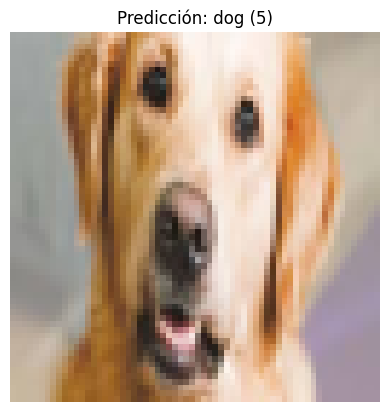

El modelo predice: dog


In [ ]:
while True:
  if cargados == False:
    Load_models()

  des = input("1, 2, 3, 4: ")
  if des == "1":
    uploaded_files = Subir_imagen()
    Mostra_imagen(uploaded_files)

  elif des == "2":
    Encontrar_num()

  elif des == "3":
    cargados = False
    print("Modelo reseteado y cargandose nuevamente")
  elif des == "4":
    break
  else:
    print("Opcion no valida")

In [ ]:
#!pip install tensorflowjs

In [ ]:
#!tensorflowjs_converter --input_format keras Modelo.h5 Carpeta_salida/